## Describing the dataset:
lever_position: This could represent the throttle position or engine power setting.

ship_speed: The vessel's speed through the water.

gt_shaft_torque: The torque generated by the gas turbine shaft.

gt_rate_of_revolutions (gt_n): Rotational speed of the gas turbine.

gas_generator_rate_of_revolutions (gg_n): Rotational speed of the gas turbine's gas generator section.

starboard_propeller_torque, port_propeller_torque: Torque generated by the starboard and port propellers, respectively.

hp_turbine_exit_temperature (t48): Temperature of the exhaust gas exiting the high-pressure turbine.

gt_compressor_inlet_air_temperature (t1): Temperature of the air entering the gas turbine compressor.

gt_compressor_outlet_air_temperature (t2): Temperature of the air exiting the gas turbine compressor.

hp_turbine_exit_pressure (p48): Pressure of the exhaust gas exiting the high-pressure turbine.

gt_compressor_inlet_air_pressure, gt_compressor_outlet_air_pressure: Pressure of the air at the inlet and outlet of the gas turbine compressor.

gt_exhaust_gas_pressure: Pressure of the exhaust gas after the turbine.

turbine_injection_control: This could be a control signal or setting for fuel injection into the turbine.

fuel_flow: The rate at which fuel is being consumed by the engine.

gt_compressor_decay_state_coefficient, gt_turbine_decay_state_coefficient: These likely represent indicators of the health or degradation state of the gas turbine compressor and turbine sections, respectively. Values closer to 1 might indicate healthy components, while values deviating significantly could suggest potential issues.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ship.csv")
df.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
df.tail()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
11929,11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.0,1.0
11930,11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.0,1.0
11931,11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.0,1.0
11932,11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.0,1.0
11933,11933,9.300,27,72775.130,3560.400,9742.950,644.880,644.880,1038.411,288,767.595,4.531,0.998,22.464,1.052,86.067,1.704,1.0,1.0


In [4]:
df.shape

(11934, 19)

# DATA PREPROCESSING

In [5]:
df.columns

Index(['index', 'Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [6]:
df=df.drop('index',axis=1)
df.head(3)

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975


In [7]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Lever position                                              0
Ship speed (v)                                              0
Gas Turbine (GT) shaft torque (GTT) [kN m]                  0
GT rate of revolutions (GTn) [rpm]                          0
Gas Generator rate of revolutions (GGn) [rpm]               0
Starboard Propeller Torque (Ts) [kN]                        0
Port Propeller Torque (Tp) [kN]                             0
Hight Pressure (HP) Turbine exit temperature (T48) [C]      0
GT Compressor inlet air temperature (T1) [C]                0
GT Compressor outlet air temperature (T2) [C]               0
HP Turbine exit pressure (P48) [bar]                        0
GT Compressor inlet air pressure (P1) [bar]                 0
GT Compressor outlet air pressure (P2) [bar]                0
GT exhaust gas pressure (Pexh) [bar]                        0
Turbine Injecton Control (TIC) [%]                          0
Fuel flow (mf) [kg/s]                  

In [8]:
df

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [9]:
# Define the new column names
new_column_names = [
    'lever_position', 'ship_speed', 'gt_shaft_torque', 'gt_rate_of_revolutions',
    'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 'port_propeller_torque',
    'hp_turbine_exit_temperature', 'gt_compressor_inlet_air_temperature',
    'gt_compressor_outlet_air_temperature', 'hp_turbine_exit_pressure',
    'gt_compressor_inlet_air_pressure', 'gt_compressor_outlet_air_pressure',
    'gt_exhaust_gas_pressure', 'turbine_injection_control', 'fuel_flow',
    'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient'
]

# Rename the columns
df.columns = new_column_names

# Check the updated column names
print(df.columns)


Index(['lever_position', 'ship_speed', 'gt_shaft_torque',
       'gt_rate_of_revolutions', 'gas_generator_rate_of_revolutions',
       'starboard_propeller_torque', 'port_propeller_torque',
       'hp_turbine_exit_temperature', 'gt_compressor_inlet_air_temperature',
       'gt_compressor_outlet_air_temperature', 'hp_turbine_exit_pressure',
       'gt_compressor_inlet_air_pressure', 'gt_compressor_outlet_air_pressure',
       'gt_exhaust_gas_pressure', 'turbine_injection_control', 'fuel_flow',
       'gt_compressor_decay_state_coefficient',
       'gt_turbine_decay_state_coefficient'],
      dtype='object')


# DESCRIPTIVE STATISTICS ON THE DATASET

In [10]:
df.describe()

,lever_position,ship_speed,gt_shaft_torque,gt_rate_of_revolutions,gas_generator_rate_of_revolutions,starboard_propeller_torque,port_propeller_torque,hp_turbine_exit_temperature,gt_compressor_inlet_air_temperature,gt_compressor_outlet_air_temperature,hp_turbine_exit_pressure,gt_compressor_inlet_air_pressure,gt_compressor_outlet_air_pressure,gt_exhaust_gas_pressure,turbine_injection_control,fuel_flow,gt_compressor_decay_state_coefficient,gt_turbine_decay_state_coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [11]:
df.mean()

lever_position                               5.166667
ship_speed                                  15.000000
gt_shaft_torque                          27247.498685
gt_rate_of_revolutions                    2136.289256
gas_generator_rate_of_revolutions         8200.947312
starboard_propeller_torque                 227.335768
port_propeller_torque                      227.335768
hp_turbine_exit_temperature                735.495446
gt_compressor_inlet_air_temperature        288.000000
gt_compressor_outlet_air_temperature       646.215331
hp_turbine_exit_pressure                     2.352963
gt_compressor_inlet_air_pressure             0.998000
gt_compressor_outlet_air_pressure           12.297123
gt_exhaust_gas_pressure                      1.029474
turbine_injection_control                   33.641261
fuel_flow                                    0.662440
gt_compressor_decay_state_coefficient        0.975000
gt_turbine_decay_state_coefficient           0.987500
dtype: float64

In [12]:
# Calculate skewness and kurtosis for each numerical column
skewness = df.skew()
kurtosis = df.kurtosis()
# Print skewness and kurtosis for each numerical column
print("Skewness for each numerical column:")
print(skewness)
print("\nKurtosis for each numerical column:")
print(kurtosis)

Skewness for each numerical column:
lever_position                           0.022310
ship_speed                               0.000000
gt_shaft_torque                          0.765286
gt_rate_of_revolutions                   0.566972
gas_generator_rate_of_revolutions       -0.139727
starboard_propeller_torque               0.806980
port_propeller_torque                    0.806980
hp_turbine_exit_temperature              0.560578
gt_compressor_inlet_air_temperature      0.000000
gt_compressor_outlet_air_temperature     0.425686
hp_turbine_exit_pressure                 0.706927
gt_compressor_inlet_air_pressure         0.000000
gt_compressor_outlet_air_pressure        0.628547
gt_exhaust_gas_pressure                  0.772999
turbine_injection_control                0.896777
fuel_flow                                0.999515
gt_compressor_decay_state_coefficient    0.000000
gt_turbine_decay_state_coefficient       0.000000
dtype: float64

Kurtosis for each numerical column:
lever_positi

# EDA ON THE DATASET

In [13]:
import seaborn as sns

###  Predictive Maintenance for Engine Components
Focussing  on sensor readings and operational parameters related to engine components such as shaft torque, turbine revolutions, and temperature. Analyzing the distribution of these parameters and identify any anomalies or patterns that may indicate potential failures.

<Figure size 1200x800 with 0 Axes>

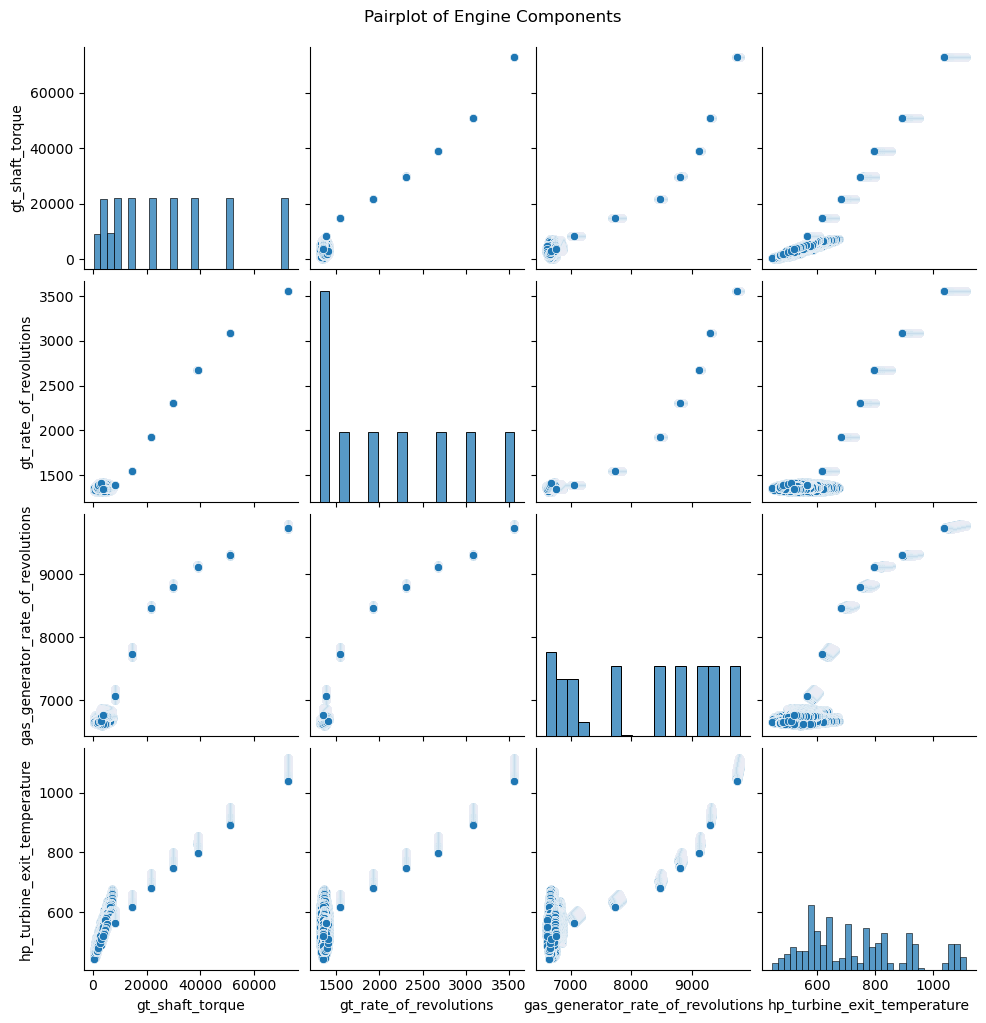

In [14]:
# Define relevant columns related to engine components with new names
engine_cols_new = ['gt_shaft_torque', 'gt_rate_of_revolutions',
                   'gas_generator_rate_of_revolutions', 'hp_turbine_exit_temperature']

# EDA
plt.figure(figsize=(12, 8))
sns.pairplot(df[engine_cols_new])
plt.suptitle('Pairplot of Engine Components', y=1.02)
plt.show()




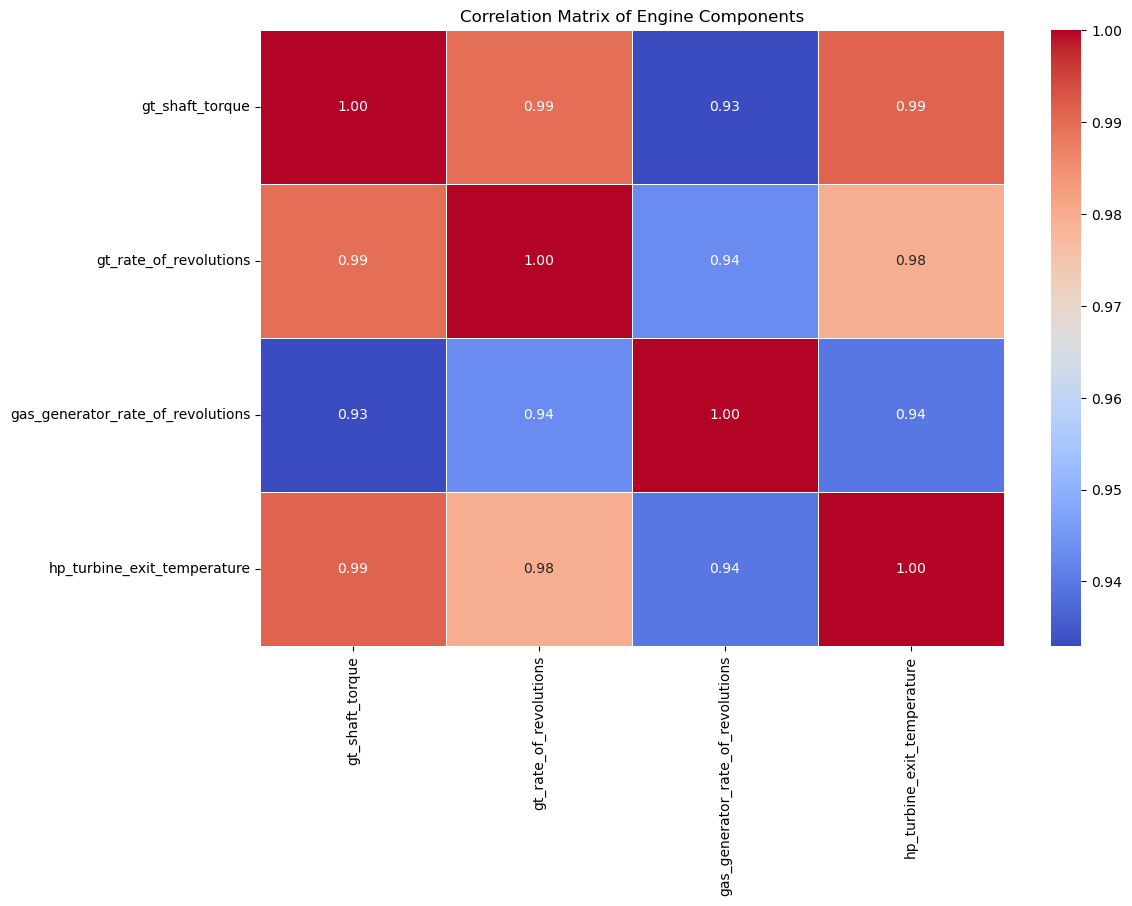

In [15]:
#Correlation matrix of engine components
plt.figure(figsize=(12, 8))
sns.heatmap(df[engine_cols_new].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Engine Components')
plt.show()

## Understanding Operational Parameters

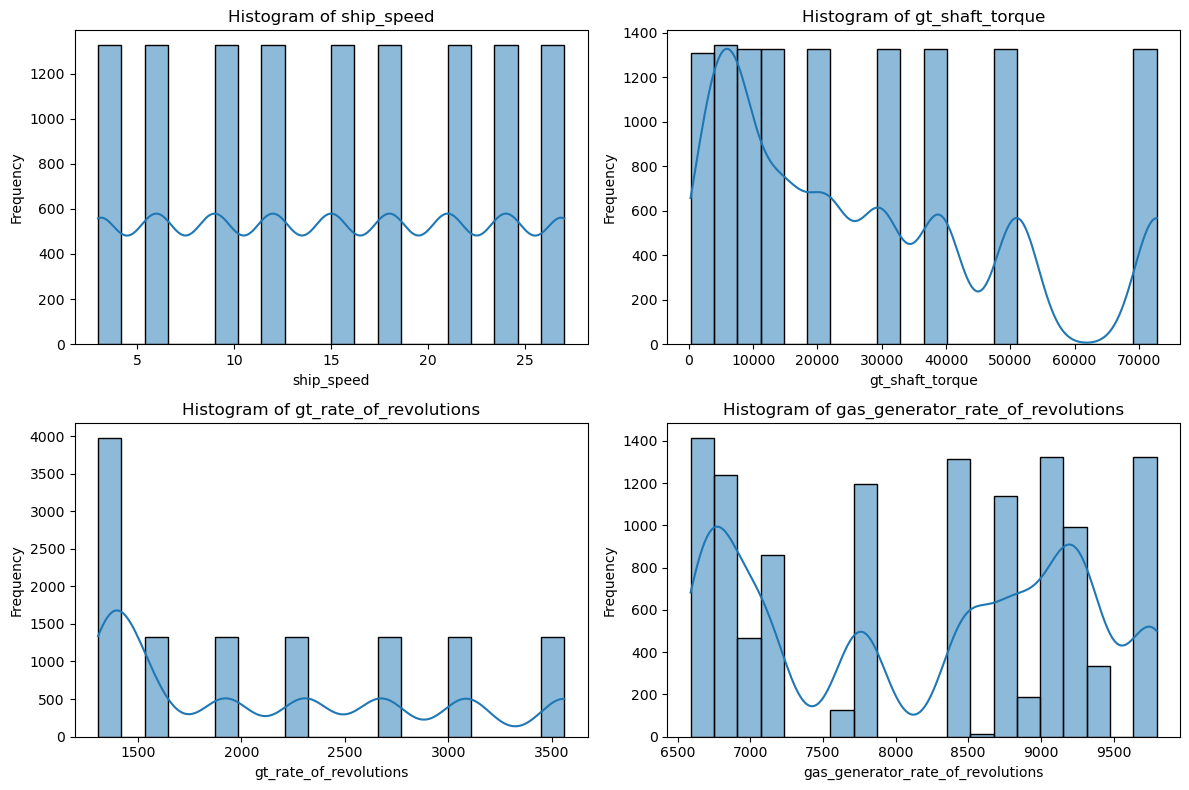

In [16]:
# Define relevant columns related to operational parameters
operational_cols = ['ship_speed', 'gt_shaft_torque', 'gt_rate_of_revolutions', 'gas_generator_rate_of_revolutions']

# EDA
plt.figure(figsize=(12, 8))
for i, col in enumerate(operational_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Detecting Anomalies in Turbine Operation


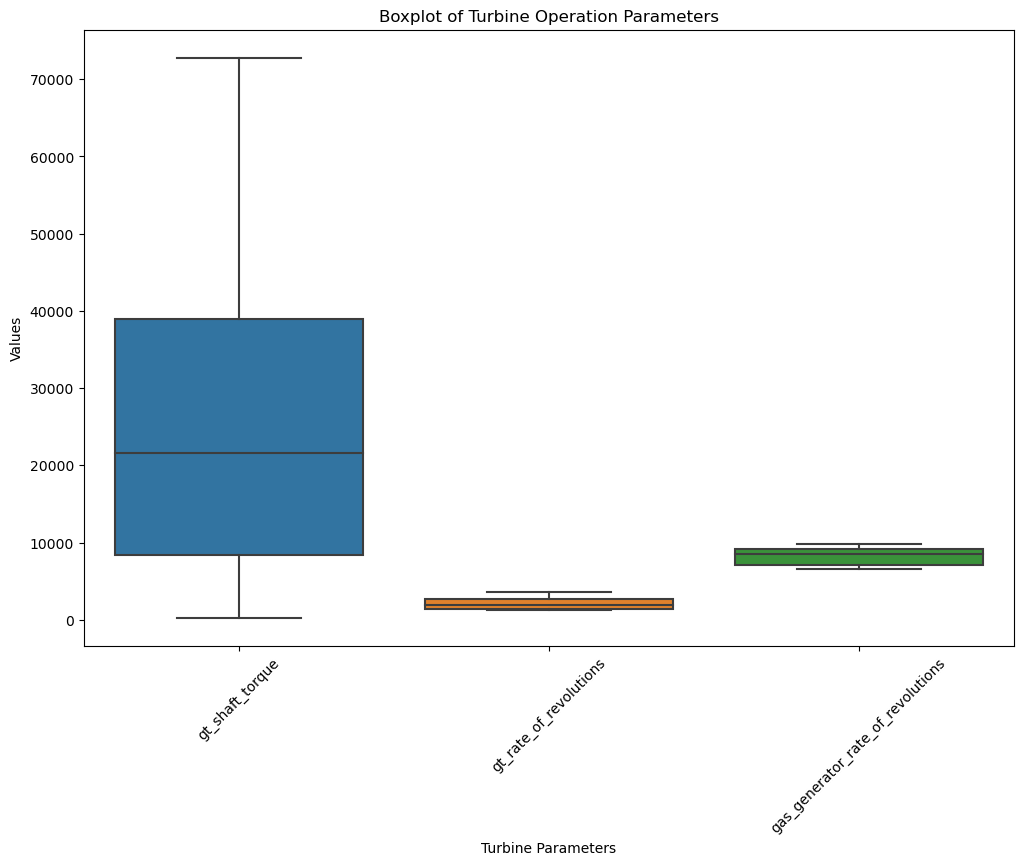

In [17]:
# Define relevant columns related to turbine operation
turbine_cols = ['gt_shaft_torque', 'gt_rate_of_revolutions', 'gas_generator_rate_of_revolutions']

# EDA
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[turbine_cols])
plt.title('Boxplot of Turbine Operation Parameters')
plt.xlabel('Turbine Parameters')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Analyzing the Relationship between Shaft Torque and Turbine Rate of Revolutions
Analyzing the relationship between shaft torque and turbine rate of revolutions is crucial in understanding the performance and operational dynamics of the gas turbine system aboard a ship. 

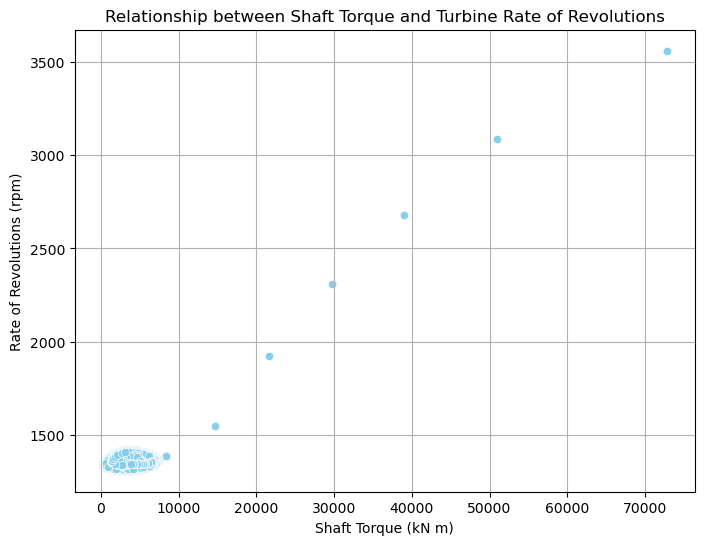

In [18]:
# Define relevant columns
shaft_torque = 'gt_shaft_torque'
rate_of_revolutions = 'gt_rate_of_revolutions'

# EDA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=shaft_torque, y=rate_of_revolutions, color='skyblue')
plt.title('Relationship between Shaft Torque and Turbine Rate of Revolutions')
plt.xlabel('Shaft Torque (kN m)')
plt.ylabel('Rate of Revolutions (rpm)')
plt.grid(True)
plt.show()


#Most of the points cluster around the lower left corner of the graph. This concentration suggests that there is a relationship between lower shaft torque and a lower rate of revolutions.

## Correlation heatmap


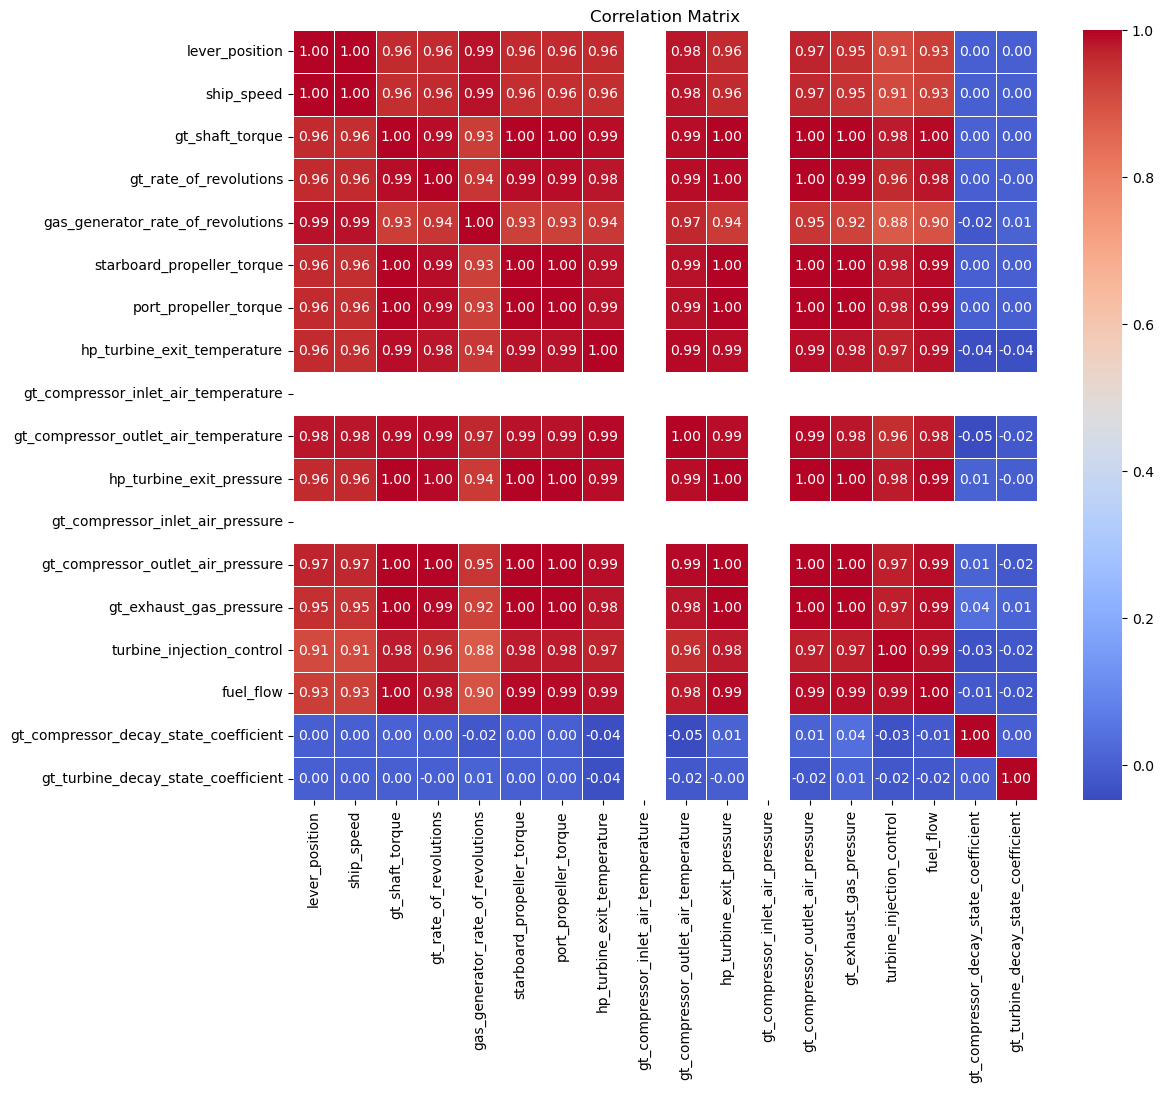

In [19]:
# Define relevant columns
relevant_columns = ['lever_position', 'ship_speed', 'gt_shaft_torque', 'gt_rate_of_revolutions',
                    'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 'port_propeller_torque',
                    'hp_turbine_exit_temperature', 'gt_compressor_inlet_air_temperature',
                    'gt_compressor_outlet_air_temperature', 'hp_turbine_exit_pressure',
                    'gt_compressor_inlet_air_pressure', 'gt_compressor_outlet_air_pressure',
                    'gt_exhaust_gas_pressure', 'turbine_injection_control', 'fuel_flow',
                    'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient']

# Compute the correlation matrix
correlation_matrix = df[relevant_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Performing Linear regression without applying LDA
Problem Statement:
The goal is to develop a predictive model for estimating the speed of a ship based on various operational parameters.
The model's performance will be evaluated using cross-validation techniques to ensure robustness and generalizability across different subsets of the data. Additionally, metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R^2 Score will be used to assess the model's accuracy and reliability in predicting ship speed.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define features (independent variables) and target (dependent variable)
features = df[['lever_position', 'gt_shaft_torque', 'gt_rate_of_revolutions',
               'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 
               'port_propeller_torque', 'hp_turbine_exit_temperature', 
               'gt_compressor_inlet_air_temperature', 'gt_compressor_outlet_air_temperature', 
               'hp_turbine_exit_pressure', 'gt_compressor_inlet_air_pressure', 
               'gt_compressor_outlet_air_pressure', 'gt_exhaust_gas_pressure', 
               'turbine_injection_control', 'fuel_flow', 
               'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient']]
target = df['ship_speed']

# Initialize linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, features, target, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.9999675  0.99997677 0.99997813 0.99997794 0.99997602]
Average Cross-Validation Score: 0.9999752721144276


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define  independent variables and target variable
features = df[['lever_position', 'gt_shaft_torque', 'gt_rate_of_revolutions',
               'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 
               'port_propeller_torque', 'hp_turbine_exit_temperature', 
               'gt_compressor_inlet_air_temperature', 'gt_compressor_outlet_air_temperature', 
               'hp_turbine_exit_pressure', 'gt_compressor_inlet_air_pressure', 
               'gt_compressor_outlet_air_pressure', 'gt_exhaust_gas_pressure', 
               'turbine_injection_control', 'fuel_flow', 
               'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient']]
target = df['ship_speed']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Calculate accuracy
accuracy = r2 * 100
print("Accuracy:", accuracy, "%")

Mean Squared Error (MSE): 0.001262403396756612
Root Mean Squared Error (RMSE): 0.035530316586777154
R^2 Score: 0.9999787467182247
Accuracy: 99.99787467182247 %


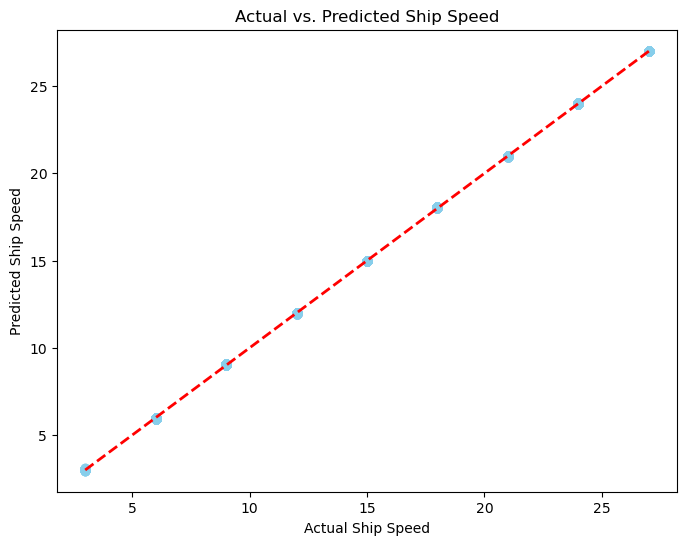

In [23]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ship Speed')
plt.xlabel('Actual Ship Speed')
plt.ylabel('Predicted Ship Speed')
plt.show()

## Performing Linear regression after applying PCA
PCA(Principal Component Analysis) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving the most important information and capturing the underlying structure of the data.It does so by transforming the original variables into a new set of orthogonal variables, called principal components, which are linear combinations of the original variables. 

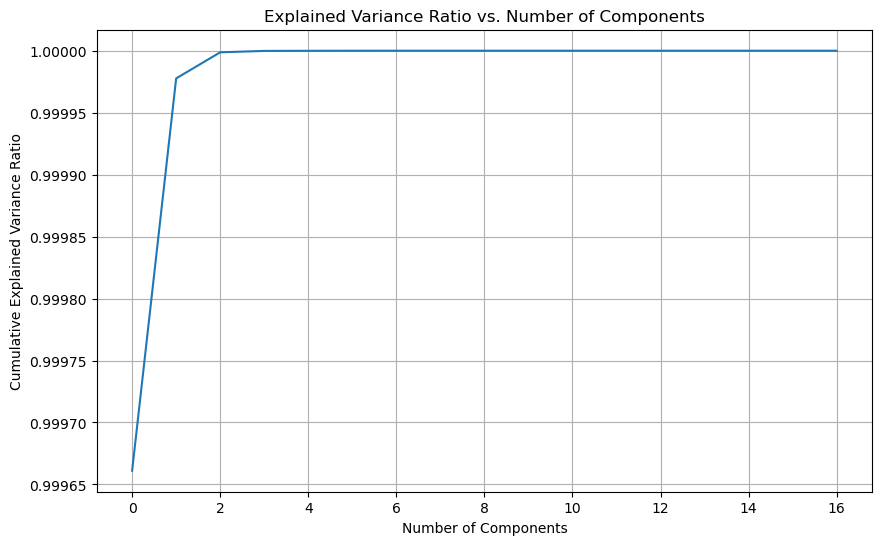

In [24]:

from sklearn.decomposition import PCA

# Define features (independent variables)
features = df[['lever_position', 'gt_shaft_torque', 'gt_rate_of_revolutions',
               'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 
               'port_propeller_torque', 'hp_turbine_exit_temperature', 
               'gt_compressor_inlet_air_temperature', 'gt_compressor_outlet_air_temperature', 
               'hp_turbine_exit_pressure', 'gt_compressor_inlet_air_pressure', 
               'gt_compressor_outlet_air_pressure', 'gt_exhaust_gas_pressure', 
               'turbine_injection_control', 'fuel_flow', 
               'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient']]

# Perform PCA to find optimal number of components
pca = PCA()
pca.fit(features)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


### The explained variance ratio helps determine the proportion of variance in the dataset explained by each principal component, guiding the selection of an appropriate number of components to retain while reducing dimensionality. This aids in preserving the most significant information while discarding redundant or noise-related features, facilitating more efficient and interpretable data representation.

Mean Squared Error (MSE): 0.967685651564775
Root Mean Squared Error (RMSE): 0.9837101461125503
R^2 Score: 0.9837084596924565


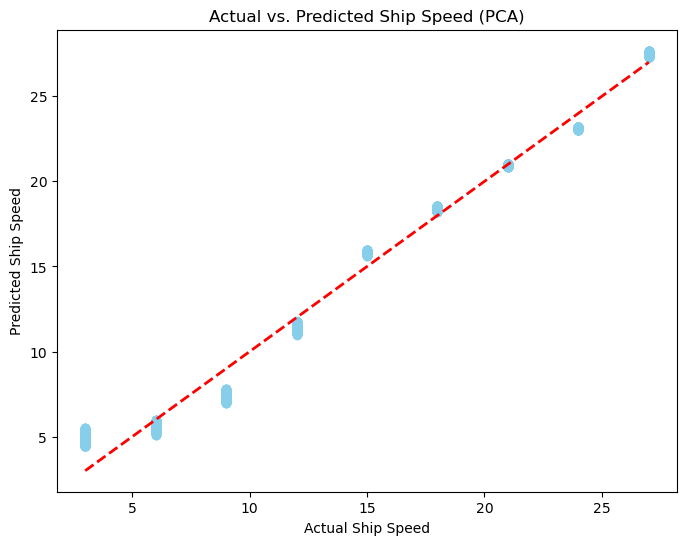

Accuracy: 98.37084596924565 %


In [25]:
from sklearn.decomposition import PCA

# Define features (independent variables) and target (dependent variable)
features = df[['lever_position', 'gt_shaft_torque', 'gt_rate_of_revolutions',
               'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 
               'port_propeller_torque', 'hp_turbine_exit_temperature', 
               'gt_compressor_inlet_air_temperature', 'gt_compressor_outlet_air_temperature', 
               'hp_turbine_exit_pressure', 'gt_compressor_inlet_air_pressure', 
               'gt_compressor_outlet_air_pressure', 'gt_exhaust_gas_pressure', 
               'turbine_injection_control', 'fuel_flow', 
               'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient']]

target = df['ship_speed']

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  
features_pca = pca.fit_transform(features)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ship Speed (PCA)')
plt.xlabel('Actual Ship Speed')
plt.ylabel('Predicted Ship Speed')
plt.show()

# Calculate accuracy
accuracy = r2 * 100
print("Accuracy:", accuracy, "%")


## Performing linear regression after applying LDA
Linear Discriminant Analysis (LDA) is a dimensionality reduction technique commonly used for classification tasks. Unlike PCA, which focuses on maximizing variance, LDA aims to maximize the separation between different classes in the data. By projecting the data onto a lower-dimensional subspace while preserving class discriminatory information, LDA identifies the axes (linear discriminants) that best separate the classes. 

Mean Squared Error (MSE): 0.009985688836775483
Root Mean Squared Error (RMSE): 0.09992841856436778
R^2 Score: 0.9998318852285142


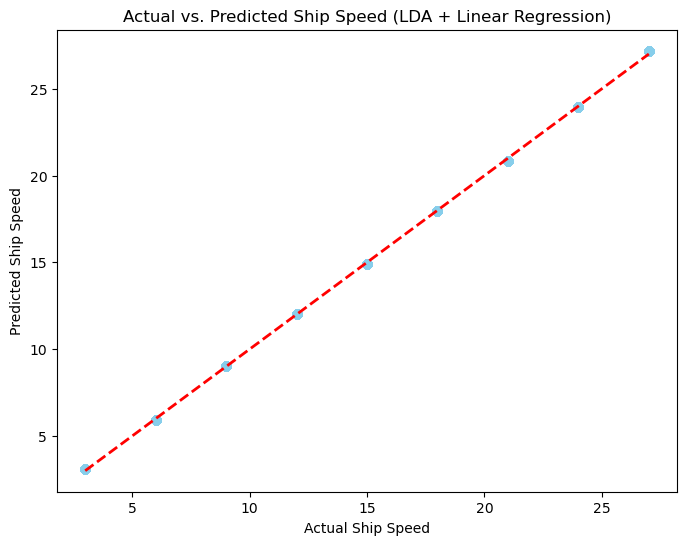

accuracy:  99.98318852285142 %


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Define features (independent variables) and target (dependent variable)
features = df[['lever_position', 'gt_shaft_torque', 'gt_rate_of_revolutions',
               'gas_generator_rate_of_revolutions', 'starboard_propeller_torque', 
               'port_propeller_torque', 'hp_turbine_exit_temperature', 
               'gt_compressor_inlet_air_temperature', 'gt_compressor_outlet_air_temperature', 
               'hp_turbine_exit_pressure', 'gt_compressor_inlet_air_pressure', 
               'gt_compressor_outlet_air_pressure', 'gt_exhaust_gas_pressure', 
               'turbine_injection_control', 'fuel_flow', 
               'gt_compressor_decay_state_coefficient', 'gt_turbine_decay_state_coefficient']]
target = df['ship_speed']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and fit LDA
lda = LDA(n_components=3)  
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train_lda, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_lda)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = (mse)**(1/2)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Ship Speed (LDA + Linear Regression)')
plt.xlabel('Actual Ship Speed')
plt.ylabel('Predicted Ship Speed')
plt.show()

accuracy=r2*100
print("accuracy: ",accuracy,'%')


## Performing Linear regression after applying SVD
Singular Value Decomposition (SVD) is a matrix factorization technique used to decompose a matrix into three separate matrices.SVD provides a compact representation of the original data and captures the underlying structure and relationships within it.

Mean Squared Error (MSE): 0.9785643520742909
R^2 Score: 0.9835253105597213
accuracy:  98.35253105597212 %


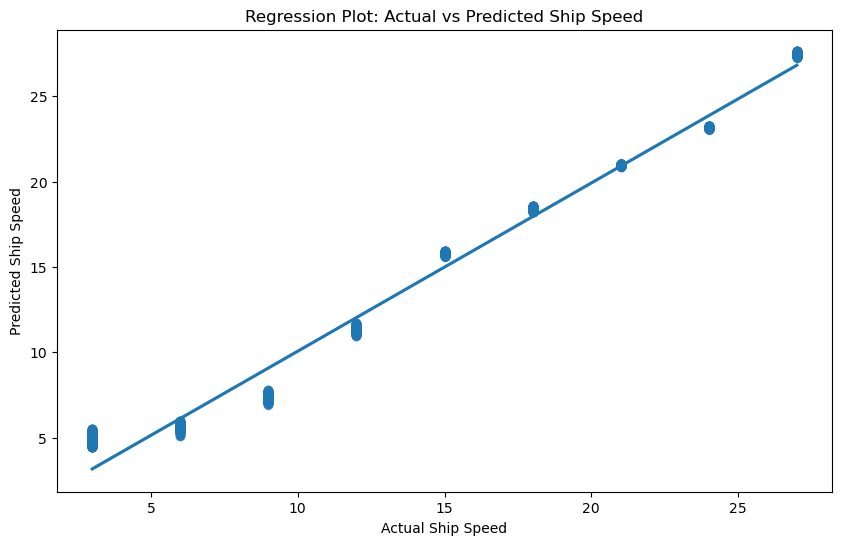

In [27]:
from sklearn.decomposition import TruncatedSVD

# Select features and target variable
X = df.drop(columns=['ship_speed'])
y = df['ship_speed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Singular Value Decomposition
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Train linear regression model
regressor = LinearRegression()
regressor.fit(X_train_svd, y_train)

# Predictions
y_pred = regressor.predict(X_test_svd)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)
# Calculate accuracy in percentage
accuracy = r2 * 100
print('accuracy: ',accuracy,'%')

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Ship Speed")
plt.ylabel("Predicted Ship Speed")
plt.title("Regression Plot: Actual vs Predicted Ship Speed")
plt.show()

In [29]:
data = {
    'Accuracies': ['Before applying', 'After applying'],
    'PCA': [99.997, 98.370],
    'LDA': [99.997, 99.983],
    'SVD':[99.997,98.352]
    
}
df_new=pd.DataFrame(data)
df_new

,Accuracies,PCA,LDA,SVD
0,Before applying,99.997,99.997,99.997
1,After applying,98.370,99.983,98.352


## These results suggest that while PCA may have slightly impacted the model's performance, LDA and SVD were effective in preserving or enhancing the accuracy of the predictive models.





